In [1]:
#the goal is to make an attack predictor based on total points, sp Atk, hp and defense, generation and weather or not its a legendary
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pokemon_data.csv")

In [2]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df = df[["Name","Total", "HP", "Attack", "Defense", "Generation", "Legendary"]]
df.head()

,Name,Total,HP,Attack,Defense,Generation,Legendary
0,Bulbasaur,318,45,49,49,1,False
1,Ivysaur,405,60,62,63,1,False
2,Venusaur,525,80,82,83,1,False
3,VenusaurMega Venusaur,625,80,100,123,1,False
4,Charmander,309,39,52,43,1,False


In [4]:
df.isnull().sum()

Name          0
Total         0
HP            0
Attack        0
Defense       0
Generation    0
Legendary     0
dtype: int64

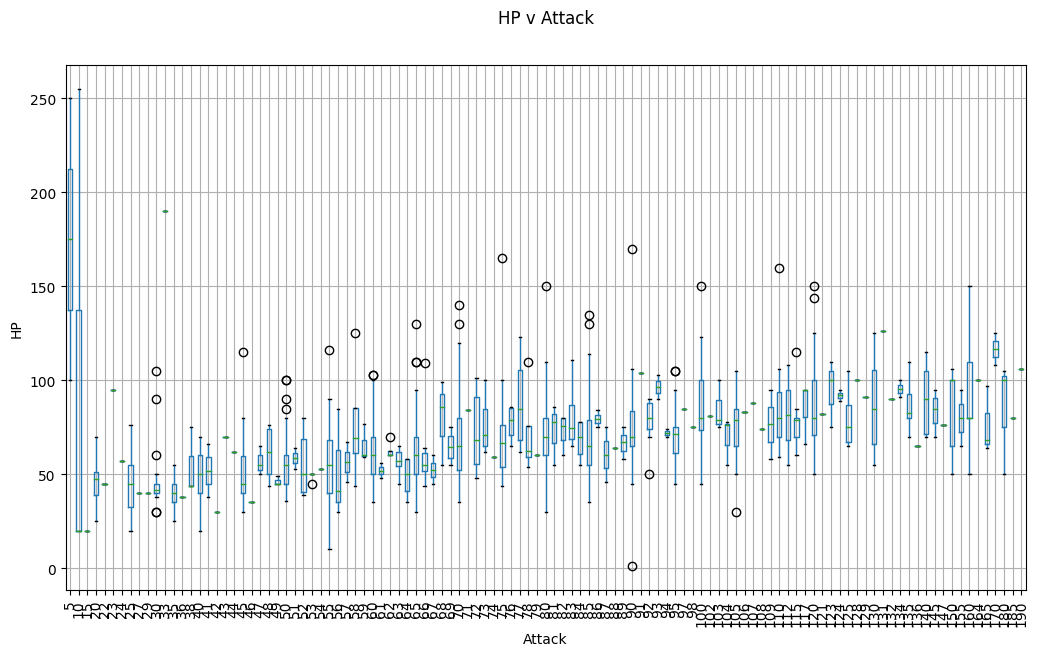

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('HP', 'Attack', ax=ax)
plt.suptitle('HP v Attack')
plt.title('')
plt.ylabel('HP')
plt.xticks(rotation=90) 
plt.show()

In [6]:
df = df[df["HP"] <= 150]

In [7]:
df["Legendary"].unique()

array([False,  True])

In [8]:
df = df.drop("Name", axis=1)
df.head()


,Total,HP,Attack,Defense,Generation,Legendary
0,318,45,49,49,1,False
1,405,60,62,63,1,False
2,525,80,82,83,1,False
3,625,80,100,123,1,False
4,309,39,52,43,1,False


In [9]:
df["Legendary"].value_counts()

Legendary
False    729
True      65
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df["Legendary"] = lb.fit_transform(df["Legendary"])
df["Legendary"]

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 794, dtype: int32

In [31]:
X = df.drop("Attack", axis=1)
y = df["Attack"]

X

,Total,HP,Defense,Generation,Legendary
0,318,45,49,1,0
1,405,60,63,1,0
2,525,80,83,1,0
3,625,80,123,1,0
4,309,39,43,1,0
...,...,...,...,...,...
795,600,50,150,6,1
796,700,50,110,6,1
797,600,80,60,6,1
798,680,80,60,6,1


In [13]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [14]:
y_pred = linear_reg.predict(X)

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))

In [16]:
error

21.496482234141062

In [17]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor()

In [18]:
y_pred = dec_tree_reg.predict(X)

In [19]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [20]:
error

3.0236612389606883

In [21]:
from sklearn.ensemble import RandomForestRegressor
random_for_reg = RandomForestRegressor()
random_for_reg.fit(X, y.values)


RandomForestRegressor()

In [22]:
y_pred = random_for_reg.predict(X)

In [23]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [24]:
error

8.880529131242248

In [25]:
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.0f}".format(error))

3


In [26]:
X

,Total,HP,Defense,Generation,Legendary
0,318,45,49,1,0
1,405,60,63,1,0
2,525,80,83,1,0
3,625,80,123,1,0
4,309,39,43,1,0
...,...,...,...,...,...
795,600,50,150,6,1
796,700,50,110,6,1
797,600,80,60,6,1
798,680,80,60,6,1


In [27]:
import pickle

data = {"model":dec_tree_reg, "lb":lb}

with open('saved_data.pkl', 'wb') as file:
    pickle.dump(data, file)
    

In [28]:
with open('saved_data.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
lb = data["lb"]

In [30]:
y_pred = regressor_loaded.predict(X)
y_pred

array([ 49.        ,  62.        ,  82.        , 100.        ,
        52.        ,  64.        ,  84.        , 130.        ,
       104.        ,  48.        ,  63.        ,  83.        ,
       103.        ,  30.        ,  20.        ,  45.        ,
        35.        ,  25.        ,  90.        , 150.        ,
        45.        ,  60.        ,  80.        ,  80.        ,
        56.        ,  81.        ,  60.        ,  90.        ,
        60.        ,  85.        ,  55.        ,  90.        ,
        75.        , 100.        ,  47.        ,  62.        ,
        92.        ,  57.        ,  72.        , 102.        ,
        45.        ,  70.        ,  41.        ,  76.        ,
        45.        ,  70.        ,  45.        ,  80.        ,
        50.        ,  65.        ,  80.        ,  70.        ,
        95.        ,  55.        ,  65.        ,  55.        ,
        80.        ,  45.        ,  70.        ,  52.        ,
        82.        ,  80.        , 105.        ,  70.  